In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('bhp.csv')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [6]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

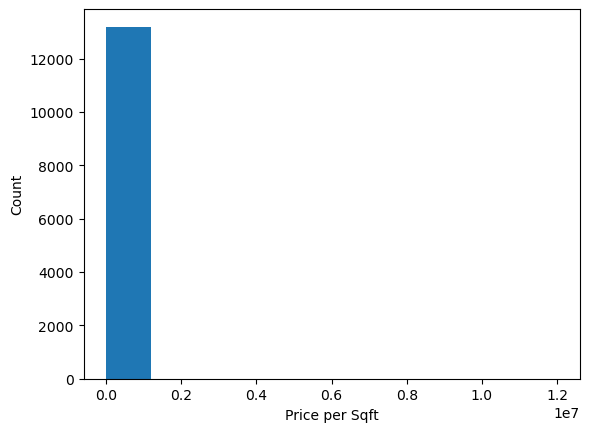

In [21]:
plt.hist(df.price_per_sqft)
plt.xlabel('Price per Sqft')
plt.ylabel('Count')
plt.show()

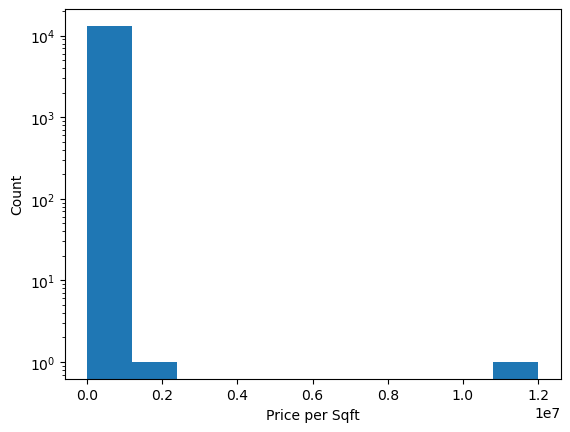

In [23]:
plt.hist(df.price_per_sqft)
plt.xlabel('Price per Sqft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

Outliers removal using Percentile 

In [25]:
lower_limit, upper_limit = df.price_per_sqft.quantile([0.001, 0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000098)

In [35]:
outliers = df[(df.price_per_sqft > upper_limit) | (df.price_per_sqft < lower_limit)]
#outliers.head(10)
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
8300,Kengeri,1 BHK,1200.0,1.0,14.0,1,1166
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333
9436,Indira Nagar,4 Bedroom,2400.0,5.0,1250.0,4,52083
7862,JP Nagar,3 BHK,20000.0,3.0,175.0,3,875
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
7166,Yelahanka,1 Bedroom,26136.0,1.0,150.0,1,573
5343,other,9 BHK,42000.0,8.0,175.0,9,416
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
1005,other,1 BHK,15.0,1.0,30.0,1,200000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000


In [37]:
df1 = df[(df.price_per_sqft < upper_limit) & (df.price_per_sqft > lower_limit)]
df1.shape

(13172, 7)

In [39]:
df.shape

(13200, 7)

In [43]:
df.shape[0] - df1.shape[0]

28

Outliers removal using Standard Deviation

In [46]:
max_limit = df1.price_per_sqft.mean() + 4*df1.price_per_sqft.std()
min_limit = df1.price_per_sqft.mean() - 4*df1.price_per_sqft.std()
max_limit, min_limit

(23227.73653589429, -9900.429065502552)

In [54]:
df1[(df1.price_per_sqft > max_limit) | (df1.price_per_sqft < min_limit)].sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
2371,other,5 Bedroom,3000.0,6.0,1000.0,5,33333
8454,other,3 Bedroom,7800.0,3.0,2000.0,3,25641
3500,Kundalahalli,1 BHK,2400.0,1.0,650.0,1,27083
11650,other,5 Bedroom,9600.0,7.0,2736.0,5,28500
1705,other,4 Bedroom,1700.0,2.0,550.0,4,32352
5144,Rajaji Nagar,3 Bedroom,2790.0,3.0,950.0,3,34050
10972,other,4 BHK,8321.0,5.0,2912.0,4,34995
9419,HSR Layout,9 Bedroom,1200.0,9.0,350.0,9,29166
12393,Electronic City Phase II,1 BHK,1200.0,1.0,295.0,1,24583
13013,other,4 Bedroom,1200.0,5.0,350.0,4,29166


In [56]:
df2 = df1[(df1.price_per_sqft < max_limit) & (df1.price_per_sqft > min_limit)]
df2.shape

(13047, 7)

In [60]:
df1.shape[0] - df2.shape[0]

125

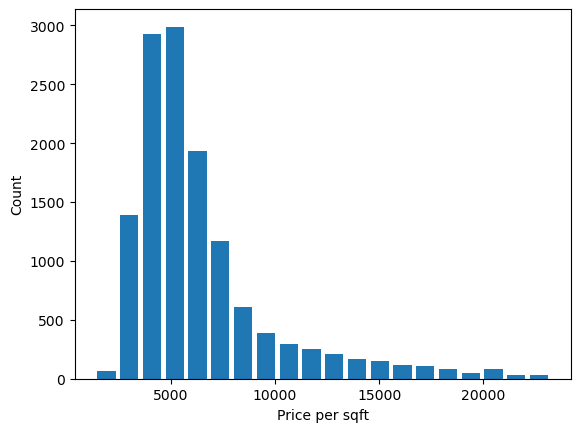

In [76]:
plt.hist(df2.price_per_sqft, bins = 20, rwidth = 0.8)
plt.xlabel('Price per sqft')
plt.ylabel('Count')
plt.show()

Outliers removal using zscore

In [78]:
df1['zscore'] = (df1.price_per_sqft - df1.price_per_sqft.mean())/df1.price_per_sqft.std()
df1.sample(10)

/var/folders/js/pcxnd6bs7yn6h514mnlgcpfr0000gn/T/ipykernel_3760/1887923704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['zscore'] = (df1.price_per_sqft - df1.price_per_sqft.mean())/df1.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
3504,Whitefield,2 BHK,1495.0,2.0,79.5,2,5317,-0.325199
4130,other,4 Bedroom,1200.0,4.0,140.0,4,11666,1.207998
1167,Magadi Road,2 BHK,1000.0,2.0,46.5,2,4650,-0.486270
1667,Hebbal Kempapura,4 Bedroom,1200.0,4.0,215.0,4,17916,2.717288
10535,other,5 Bedroom,2400.0,5.0,150.0,5,6250,-0.099892
5580,other,6 Bedroom,800.0,8.0,150.0,6,18750,2.918688
5112,Kothanur,3 BHK,1820.0,3.0,77.0,3,4230,-0.587694
2133,other,3 BHK,1375.0,2.0,85.0,3,6181,-0.116554
10354,Yelachenahalli,2 BHK,1103.0,2.0,55.0,2,4986,-0.405130
9426,Parappana Agrahara,2 BHK,1092.0,2.0,43.0,2,3937,-0.658450


Using zscore threshold as '4'

In [81]:
outliers_z = df1[(df1.zscore < -4) | (df1.zscore > 4)]
outliers_z.shape

(125, 8)

In [83]:
outliers_z.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
12631,Rajaji Nagar,5 Bedroom,2500.0,4.0,650.0,5,26000,4.669464
12671,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
4993,other,6 Bedroom,825.0,6.0,400.0,6,48484,10.099043
4645,other,10 Bedroom,2416.0,10.0,600.0,10,24834,4.387891
12352,other,6 Bedroom,2400.0,5.0,750.0,6,31250,5.937267


In [85]:
df3 = df1[(df1.zscore > -4) & (df1.zscore < 4)]
df3.shape

(13047, 8)

In [87]:
df1.shape[0] - df3.shape[0]

125